In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
file_datos ="datasets/datos_corregidos.csv"
datos = pd.read_csv(file_datos)
#datos = datos[datos["velocidad"]>0]
#datos = datos[datos["velocidad"]<100]
#datos = datos.tail(-1) #primer registro tiene velocidad infinita porque ds=0
datos.head(20)


,date,height,old_height,utm_x,utm_y,distance,slope,sum_distance,velocidad,ds,velocidad_gps,consumo_total,consumo_inst,latitud,longitud
0,12:08:55,2350.300000,2350.3,703271.372621,9.615251e+06,37.377786,0.000000,387.708336,18.688893,2,67.75,3092.02,13.75,-3.479121,-79.170212
1,12:08:57,2350.300000,2350.3,703261.188589,9.615214e+06,38.199941,0.000000,425.908277,19.099971,2,69.02,3092.03,14.45,-3.479454,-79.170303
2,12:08:59,2350.300000,2350.3,703250.892573,9.615177e+06,38.655939,0.000000,464.564216,19.327969,2,69.49,3092.04,16.45,-3.479791,-79.170395
3,12:09:01,2350.300000,2350.3,703240.706827,9.615139e+06,39.053783,0.000000,503.617999,19.526891,2,70.25,3092.05,16.00,-3.480132,-79.170486
4,12:09:03,2350.300000,2350.3,703229.521147,9.615102e+06,39.218629,0.000000,542.836628,19.609314,2,69.73,3092.06,16.05,-3.480472,-79.170586
5,12:09:05,2350.300000,2350.3,703220.114369,9.615064e+06,38.323039,0.000000,581.159667,19.161520,2,68.95,3092.07,16.15,-3.480808,-79.170670
6,12:09:09,2341.121221,2350.3,703186.772833,9.615026e+06,37.062498,0.000000,619.392695,18.531249,2,66.36,3092.09,15.55,-3.481156,-79.170969
7,12:09:11,2345.488177,2350.3,703193.257652,9.614995e+06,36.642161,0.000000,651.829531,18.321081,2,65.32,3092.09,15.60,-3.481439,-79.170910
8,12:09:13,2349.855133,2350.3,703199.742471,9.614963e+06,35.841373,0.000000,684.266367,17.920687,2,64.08,3092.10,16.10,-3.481721,-79.170852
9,12:09:15,2354.222089,2350.3,703206.227291,9.614932e+06,35.328543,0.000000,716.703203,17.664272,2,62.80,3092.11,15.40,-3.482003,-79.170793


In [23]:
datos["velocidad_gps-ms"] = datos['velocidad_gps'] * 1000/3600
datos["next_vel"] = datos["velocidad_gps-ms"].shift(-1)

#datos["velocidad_ms"] = datos['velocidad'] #* 1000/3600
datos["next_vel_ms"] = datos["velocidad"].shift(-1)



datos['aceleracion_gps'] = ((datos["velocidad_gps-ms"] - datos["next_vel"])) / datos['ds']
datos['aceleracion_ms'] = ((datos["velocidad"] - datos["next_vel_ms"])) / datos['ds']

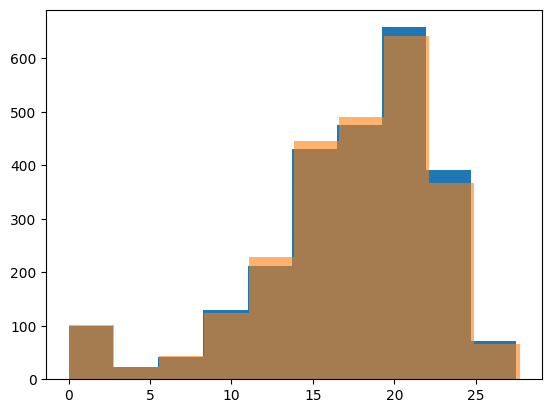

In [24]:
plt.hist(datos["velocidad_gps-ms"])
plt.hist(datos["velocidad"],alpha=0.6)
plt.show()

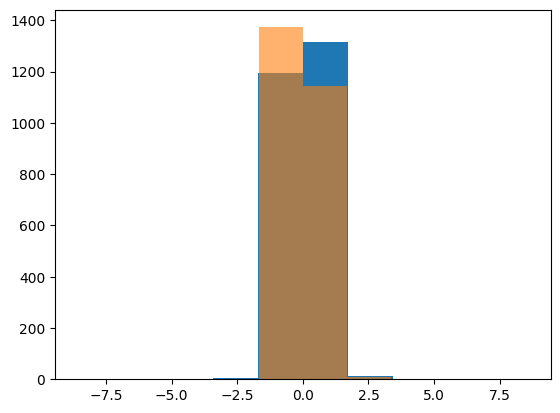

In [25]:
plt.hist(datos["aceleracion_gps"])
plt.hist(datos["aceleracion_ms"],alpha=0.6)
#plt.hist(datos["distance"])
plt.show()


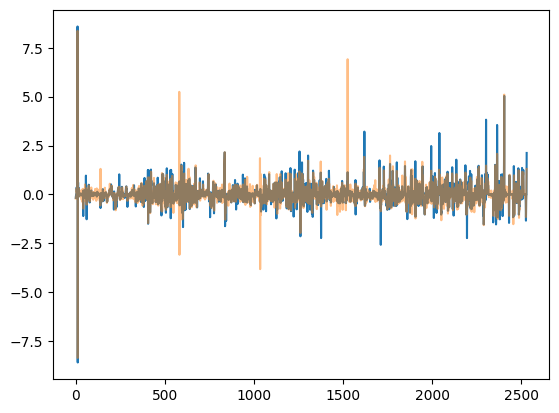

In [29]:
plt.plot(datos["aceleracion_gps"])
plt.plot(datos["aceleracion_ms"],alpha=0.5)
plt.show()
#datos.reset_index(drop=True, inplace=True)
#datos[datos['velocidad']>50]

#pd.options.display.precision = 10
#df = datos[["date","timestamp","ds","velocidad","velocidad_gps", "distance","utm_x","utm_y","slope"]]
#df.iloc[600:615,]


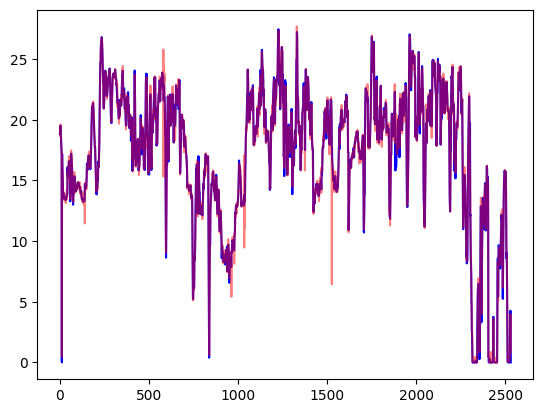

In [34]:
plt.plot(datos["velocidad_gps-ms"],'b-')
plt.plot(datos["velocidad"],'r-',alpha=0.5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae990c3100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae990c3640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae990b1e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae990c3b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae990c3e20>],
 'means': []}

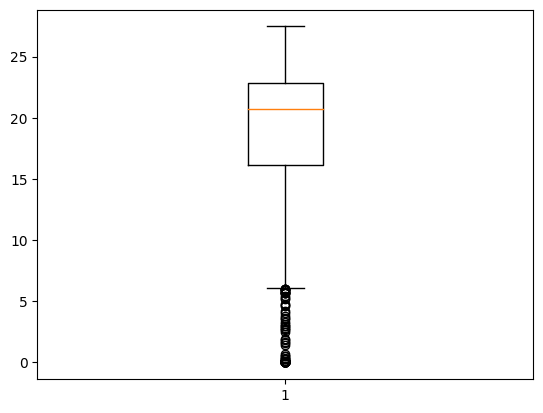

In [6]:
plt.boxplot(datos['velocidad_gps-ms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae993c8ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae994b5040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae993c8820>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae994b5580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae994b5820>],
 'means': []}

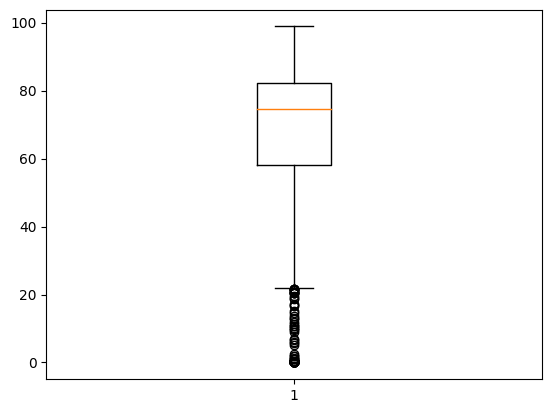

In [7]:
plt.boxplot(datos['velocidad_gps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae996d1b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae996e30a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae996d1640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae996e35e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae996e3880>],
 'means': []}

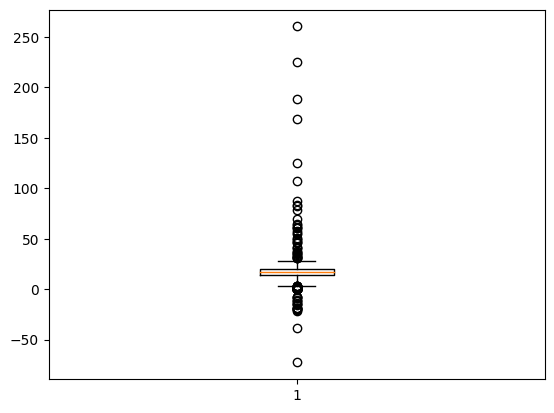

In [8]:
plt.boxplot(datos['velocidad'])

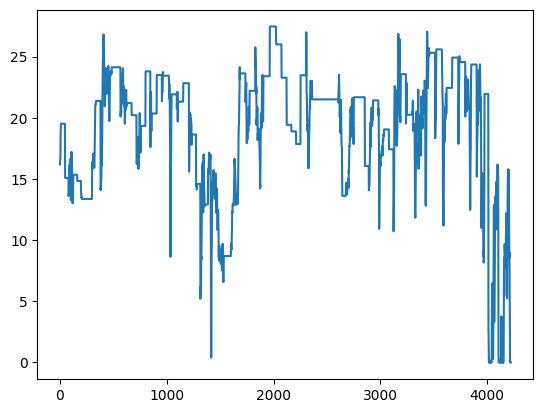

In [9]:
plt.plot(datos['velocidad_gps-ms'])

(array([1.000e+00, 2.000e+01, 4.159e+03, 2.700e+01, 8.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([-72.59617199, -39.30224123,  -6.00831048,  27.28562028,
         60.57955104,  93.8734818 , 127.16741255, 160.46134331,
        193.75527407, 227.04920482, 260.34313558]),
 <BarContainer object of 10 artists>)

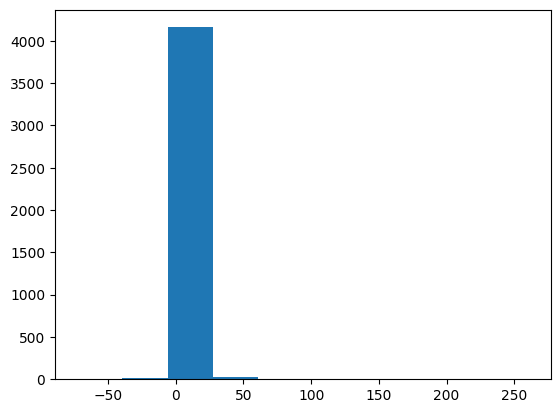

In [10]:
plt.hist(datos['velocidad'])

In [36]:
def est_energia(data, densidad_aire = 0.893, fr=0.008, rd=0.191, area_front=3.419, masa=3185, g=9.8, cd=0.5, rend_motor = 0.30, rend_trans = 0.9, LHV = 432000, densidad_diesel = 840 ):
    
    '''LHV en J/L = (43200 kJ/kg) x (1000 J/kJ) ÷ (0,84 kg/L) = 51428571.43 J/L '''
    
    Fd = (0.5) * densidad_aire * cd * area_front * (datos["velocidad"] ** 2)
    Rx = fr * masa * g * np.cos(np.degrees(np.arctan(datos['slope'])))
    Rg = masa * g *np.sin(np.degrees(np.arctan(datos['slope'])))
    Ri = masa * datos['aceleracion_ms']
    
    datos['fd'] = Fd
    datos['Rx'] = Rx
    datos['Rg'] = Rg
    datos['Ri'] = Ri

    fx = Fd + Rx + Rg + Ri
    
    datos['fx'] = fx

    potencia_rueda = fx * datos["velocidad"]
    
    datos['potencia_rueda'] = potencia_rueda

    potencia_motor = potencia_rueda / (rend_motor * rend_trans)
    
    datos['potencia_motor'] = potencia_motor

    caudal_inst = potencia_motor / (LHV * densidad_diesel )

    datos['caudal_inst'] = caudal_inst * 3600

    return datos

In [37]:
datos_energia = est_energia(datos)
datos_energia

,date,height,old_height,utm_x,utm_y,distance,slope,sum_distance,velocidad,ds,...,aceleracion_gps,aceleracion_ms,fd,Rx,Rg,Ri,fx,potencia_rueda,potencia_motor,caudal_inst
0,12:08:55,2350.3,2350.3,703271.372621,9.615251e+06,37.377786,0.000000,387.708336,18.688893,2,...,-0.176389,-0.205539,266.598519,249.704000,0.000000,-654.640857,-138.338338,-2585.390423,-9575.520085,-0.094995
1,12:08:57,2350.3,2350.3,703261.188589,9.615214e+06,38.199941,0.000000,425.908277,19.099971,2,...,-0.065278,-0.113999,278.455608,249.704000,0.000000,-363.087783,165.071825,3152.867011,11677.285225,0.115846
2,12:08:59,2350.3,2350.3,703250.892573,9.615177e+06,38.655939,0.000000,464.564216,19.327969,2,...,-0.105556,-0.099461,285.143201,249.704000,0.000000,-316.783567,218.063634,4214.727225,15610.100832,0.154862
3,12:09:01,2350.3,2350.3,703240.706827,9.615139e+06,39.053783,0.000000,503.617999,19.526891,2,...,0.072222,-0.041211,291.042755,249.704000,0.000000,-131.258622,409.488133,7996.030325,29614.927130,0.293799
4,12:09:03,2350.3,2350.3,703229.521147,9.615102e+06,39.218629,0.000000,542.836628,19.609314,2,...,0.108333,0.223897,293.504923,249.704000,0.000000,713.113223,1256.322146,24635.615999,91243.022220,0.905189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,13:48:05,2058.3,2058.3,699518.530397,9.559075e+06,5.392159,0.000000,98940.052149,2.696080,2,...,-0.329167,-0.587714,5.548250,249.704000,0.000000,-1871.869940,-1616.617690,-4358.530114,-16142.704125,-0.160146
2529,13:48:07,2058.3,2058.3,699521.068897,9.559067e+06,7.743016,0.000000,98947.795165,3.871508,2,...,0.000000,-0.059829,11.440656,249.704000,0.000000,-190.556174,70.588482,273.283889,1012.162552,0.010041
2530,13:48:09,2059.3,2059.3,699527.834504,9.559063e+06,7.982333,0.125277,98955.777498,3.991167,2,...,0.000000,0.261670,12.158789,163.400616,23602.279561,833.418214,24611.257180,98227.630784,363806.039941,3.609187
2531,13:48:11,2059.2,2059.2,699534.606142,9.559062e+06,6.935654,-0.014418,98962.713153,3.467827,2,...,2.122222,1.302933,9.179213,169.246137,-22949.616255,4149.841067,-18621.349838,-64575.623275,-239168.975092,-2.372708


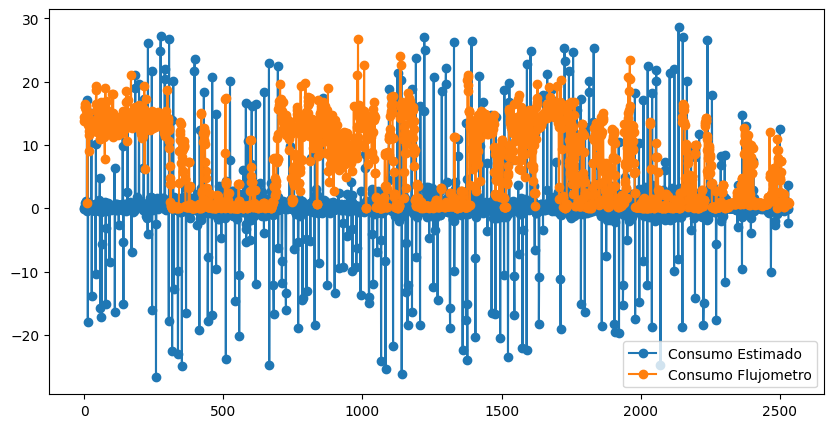

In [38]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia['caudal_inst'],'-o',label='Consumo Estimado')
plt.plot(datos_energia['consumo_inst'], '-o',label='Consumo Flujometro')



plt.legend()
plt.show()

In [9]:
datos_energia.columns

Index(['latitude', 'longitude', 'height', 'distance', 'sum_distance', 'slope',
       'date', 'utm_x', 'utm_y', 'velocidad_gps', 'consumo_total',
       'consumo_inst', 'timestamp', 'ds', 'velocidad', 'velocidad_gps-ms',
       'next_vel', 'velocidad_ms', 'next_vel_ms', 'aceleracion_gps',
       'aceleracion_ms', 'fd', 'Rx', 'Rg', 'Ri', 'fx', 'potencia_rueda',
       'potencia_motor', 'caudal_inst'],
      dtype='object')

In [40]:
datos_energia_pos = datos_energia.loc[datos_energia['caudal_inst'] > 0]
datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos_energia_pos.dropna(inplace=True)
consumo_total_estimado = datos_energia_pos['caudal_inst'].sum()
consumo_total_estimado

/tmp/ipykernel_6006/938077076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_6006/938077076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.dropna(inplace=True)


3296.8581995429877

In [41]:
consumo_total_estimado

3296.8581995429877

In [42]:
consumo_total_flujometro  = len(datos_energia.consumo_total) - datos_energia.consumo_total[0]
consumo_total_flujometro

-559.02

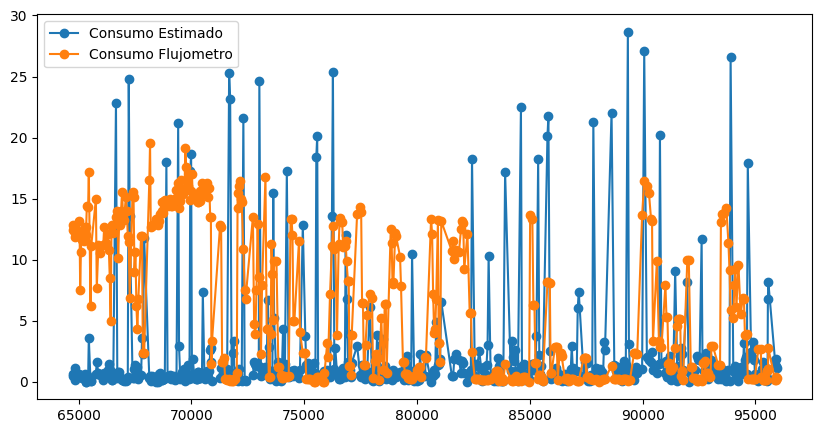

In [46]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['sum_distance'][1000:1500], datos_energia_pos['caudal_inst'][1000:1500],'-o',label='Consumo Estimado')
plt.plot(datos_energia_pos['sum_distance'][1000:1500], datos_energia_pos['consumo_inst'][1000:1500], '-o',label='Consumo Flujometro')



plt.legend()
plt.show()

In [44]:
datos_energia_pos.keys()

Index(['date', 'height', 'old_height', 'utm_x', 'utm_y', 'distance', 'slope',
       'sum_distance', 'velocidad', 'ds', 'velocidad_gps', 'consumo_total',
       'consumo_inst', 'latitud', 'longitud', 'velocidad_gps-ms', 'next_vel',
       'velocidad_ms', 'next_vel_ms', 'aceleracion_gps', 'aceleracion_ms',
       'fd', 'Rx', 'Rg', 'Ri', 'fx', 'potencia_rueda', 'potencia_motor',
       'caudal_inst'],
      dtype='object')

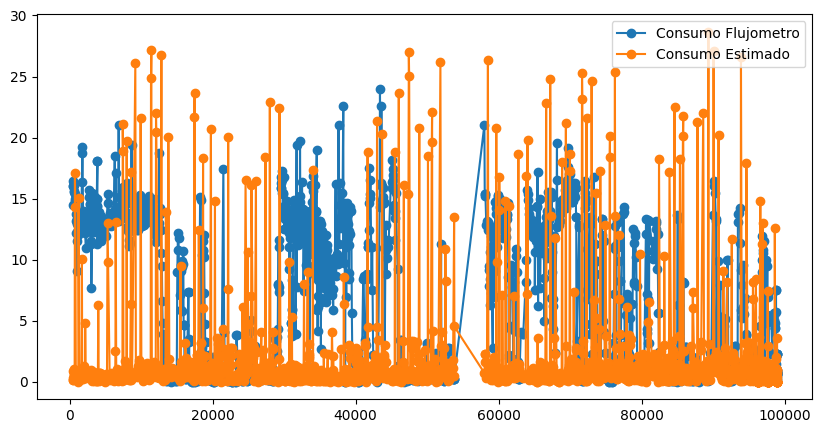

In [48]:
plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['sum_distance'], datos_energia_pos['consumo_inst'], '-o',label='Consumo Flujometro')
plt.plot(datos_energia_pos['sum_distance'], datos_energia_pos['caudal_inst'],'-o',label='Consumo Estimado')



plt.legend()
plt.show()

In [47]:
datos_energia.to_csv('consumo_estimado_corregido_aceleracion.csv', index=False)